# EDS 296 Final Mini Project
#### Author: Liz Peterson
#### Date: 6-10-25

![amazon-river-basin.jpg](amazon-river-basin.jpg)

### Introduction

The region of interest we are choosing for this assignment is Brazil, home of the Amazon. The Amazon Rainforest is located in the northwestern region of Brazil, with 60% of its coverage in this country. Brazil is home to many culturally and intrinsically rich cultures and species, surrounded by lush and tropical habitats. Brazil is the 5th largest nation in the world, spanning 10,492 mi in South America. It touches every country in South America, except for Ecuador and Chile. This country is also home to a Wonder of the World, Christ the Redeemer located in Rio de Janeiro. Every year, millions flock to this large tropical city in the southeastern end of Brazil. Because of its large area and diverse ecosystems, Brazil's climate spans from equatorial humid climates in the south to semi arid climates in the north east. 


In the [2022 election](https://www.npr.org/2022/10/30/1132561987/brazil-election-lula-da-silva), Luiz Inácio Lula da Silva beat the incumbent president, Bolsonaro, who led a far right, authoritarian presidency. This was a huge win for same sex marriage, abortion, affirmative action, indigenous rights, and environmental protections as Bolsonaro opposed each of these topics. During Bolsonaro's presidency, he rolled back on indigenous rights and facilitated deforestation in the Amazon. Since the election, President Lula de Silva has promoted many fiscal policies and social welfare programs that have led to an increase in national GDP. Much of the environmental damages in the Amazon from Bolsonaro are being reversed under Lula. Despite curbing Bolsonaro's deforestation of the Amazon, Lula has not supported legislation to phase out fossil fuels in the country. 


Understanding the geopolitical context of the region, Brazil becomes a hotspot for extreme climate events to occur, such as floods, droughts, and heatwaves. With 2024 being the hottest year on record, researchers were able to study the 32 year period from 1991 to 2023. From this [data](https://news.mongabay.com/2025/02/brazil-has-seen-a-460-increase-in-climate-related-disasters-since-the-1990s/), it was found that 64,280 climate-related disasters occured in 92% of Brazilian municipalities. Half of the disasters recorded were droughts, while flooding, torrential rains and high water levels composed 27% of the total. Storms composed 19%. More than 219 million people were affected by death, displacement, homelessness and illness. 78 million of these people were affected during the last four years. The average annual economic losses from these climate related disasters since 2020 is $8.14 billion, which is more than double the average annual loss from the previous year. This ecologically sensitive region supports millions of species and communities whose livelihoods depend entirely on the surrounding ecosystem. As climate change accelerates environmental degradation, humans will inevitably bear the mounting costs of diminished ecosystem services.

![<img src="brazil-climate1.jpeg" width="200">](brazil-climate1.jpeg)
![map](map-brazil.jpeg)

### Metrics Definition

We will be doing a regression analysis of a regional average of precipitation (pr) and air temperature (tas). These key indicators help us understand how the land the nutrients of the land will be changed under different climate scenarios. In order to investigate how these factors will change over time under a high emissions scenario, we will look at the historical period and a future projection under the SSP 585. The historical period will be from 1975 - 2025, and the future projection will be from 2026-2075. 

We will be investigating these scenarios using the CESM2 model and the GFDL-ESM4 model. These will be helpful for investigating our specific variables of interest. 

### Data I/O

In [50]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import intake
import s3fs
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import scipy.stats as stats
import pandas as pd

In [51]:
# Open the CMIP6 data catalog, store as a variable
catalog = intake.open_esm_datastore('https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.json')

In [52]:
# Figure out which member_id to use because it's not working
cesm_proj_test = catalog.search(
    activity_id='ScenarioMIP',
    source_id='CESM2',
    experiment_id='ssp585',
    table_id='Amon',
    variable_id='tas'
)

cesm_proj_test.df['member_id'].unique()

array(['r4i1p1f1', 'r11i1p1f1', 'r10i1p1f1'], dtype=object)

In [53]:
# Search catalog and store results for my 4 different queries

cesm_hist = catalog.search(activity_id = 'CMIP',
                           source_id = "CESM2",
                           experiment_id = "historical",
                           member_id = "r1i1p1f1",
                           table_id = "Amon",
                           variable_id = {"tas","pr"})

cesm_proj = catalog.search(activity_id = 'ScenarioMIP',
                           source_id = "CESM2",
                           experiment_id = "ssp585",
                           member_id = "r11i1p1f1",
                           table_id = "Amon",
                           variable_id = {"tas","pr"})

gfdl_hist = catalog.search(activity_id = 'CMIP',
                           source_id = "GFDL-ESM4",
                           experiment_id = "historical",
                           member_id = "r1i1p1f1",
                           table_id = "Amon",
                           variable_id = {"tas","pr"})

gfdl_proj = catalog.search(activity_id = 'ScenarioMIP',
                           source_id = "GFDL-ESM4",
                           experiment_id = "ssp585",
                           member_id = "r1i1p1f1",
                           table_id = "Amon",
                           variable_id = {"tas","pr"})

In [54]:
# Look at the results
display(cesm_hist.df)
display(cesm_proj.df)
display(gfdl_hist.df)
display(gfdl_proj.df)

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NCAR,CESM2,historical,r1i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190308
1,CMIP,NCAR,CESM2,historical,r1i1p1f1,Amon,pr,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190401


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,ScenarioMIP,NCAR,CESM2,ssp585,r11i1p1f1,Amon,pr,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NCAR/CESM2/ss...,NaN,20200528
1,ScenarioMIP,NCAR,CESM2,ssp585,r11i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NCAR/CESM2/ss...,NaN,20200528


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r1i1p1f1,Amon,pr,gr1,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/...,NaN,20190726
1,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r1i1p1f1,Amon,tas,gr1,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/...,NaN,20190726


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Amon,pr,gr1,s3://cmip6-pds/CMIP6/ScenarioMIP/NOAA-GFDL/GFD...,NaN,20180701
1,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Amon,tas,gr1,s3://cmip6-pds/CMIP6/ScenarioMIP/NOAA-GFDL/GFD...,NaN,20180701


In [55]:
# Save the results as xarray objects 
# Temperature variables
cesm_tas_hist = xr.open_zarr(cesm_hist.df.iloc[0]['zstore'], storage_options={'anon': True}, consolidated=True)
cesm_tas_proj = xr.open_zarr(cesm_proj.df.iloc[1]['zstore'], storage_options={'anon': True}, consolidated=True)
gfdl_tas_hist = xr.open_zarr(gfdl_hist.df.iloc[1]['zstore'], storage_options={'anon': True}, consolidated=True)
gfdl_tas_proj = xr.open_zarr(gfdl_proj.df.iloc[1]['zstore'], storage_options={'anon': True}, consolidated=True)

# Precipitation variables
cesm_pr_hist = xr.open_zarr(cesm_hist.df.iloc[1]['zstore'], storage_options={'anon': True}, consolidated=True)
cesm_pr_proj = xr.open_zarr(cesm_proj.df.iloc[0]['zstore'], storage_options={'anon': True}, consolidated=True)
gfdl_pr_hist = xr.open_zarr(gfdl_hist.df.iloc[0]['zstore'], storage_options={'anon': True}, consolidated=True)
gfdl_pr_proj = xr.open_zarr(gfdl_proj.df.iloc[0]['zstore'], storage_options={'anon': True}, consolidated=True)

In [56]:
# Concatenate the historical and projection data for CESM2
# Temperature
cesm_tas = xr.concat([cesm_tas_hist, cesm_tas_proj], dim="time")

# Precipitation
cesm_pr = xr.concat([cesm_pr_hist, cesm_pr_proj], dim="time")

In [57]:
# Concatenate the historical and projection data for GFDL-ESM4
# Temperature
gfdl_tas = xr.concat([gfdl_tas_hist, gfdl_tas_proj], dim="time")

# Precipitation
gfdl_pr = xr.concat([gfdl_pr_hist, gfdl_pr_proj], dim="time")

### Metrics Computation

## **Calculate Regionally Averaged Time Series**

Our goal here is to calculate the average value for our variables over our time periods, for each of our variables.  

In [58]:
# Specify rough lat/lon bounds for Brazil
region = [286.0128, 325.2701, -33.7683777809, 5.24448639569]

# Define time periods
per_early = [1975, 2025]
per_late = [2026, 2075]

# Convert time to datetime 
cesm_tas['time'] = cesm_tas.time.astype('datetime64[ns]')
gfdl_tas['time'] = gfdl_tas.time.astype('datetime64[ns]')
cesm_pr['time'] = cesm_pr.time.astype('datetime64[ns]')
gfdl_pr['time'] = gfdl_pr.time.astype('datetime64[ns]')

# Sort by time to fix time filtering error
cesm_tas = cesm_tas.sortby('time')
gfdl_tas = gfdl_tas.sortby('time')
cesm_pr = cesm_pr.sortby('time')
gfdl_pr = gfdl_pr.sortby('time')

In [59]:
# Get the data within our time periods for CESM2 Model
# Early period tas
cesm_tas_early = cesm_tas.sel(time=slice(str(per_early[0])+"-01-01", str(per_early[1])+"-12-31"))
# Late period tas
cesm_tas_late = cesm_tas.sel(time=slice(str(per_late[0])+"-01-01", str(per_late[1])+"-12-31"))
# Early period pr
cesm_pr_early = cesm_pr.sel(time=slice(str(per_early[0])+"-01-01", str(per_early[1])+"-12-31"))
# Late period pr
cesm_pr_late = cesm_pr.sel(time=slice(str(per_late[0])+"-01-01", str(per_late[1])+"-12-31"))

In [60]:
# Get the data within our time periods for GFDL-ESM4 Model
# Early period tas
gfdl_tas_early = gfdl_tas.sel(time=slice(str(per_early[0])+"-01-01", str(per_early[1])+"-12-31"))
# Late period tas
gfdl_tas_late = gfdl_tas.sel(time=slice(str(per_late[0])+"-01-01", str(per_late[1])+"-12-31"))
# Early period pr
gfdl_pr_early = gfdl_pr.sel(time=slice(str(per_early[0])+"-01-01", str(per_early[1])+"-12-31"))
# Late period pr
gfdl_pr_late = gfdl_pr.sel(time=slice(str(per_late[0])+"-01-01", str(per_late[1])+"-12-31"))

### **Calculate averages**

Now that we have our time period, we want to take the average and convert the temperature. 

In [61]:

# Calculate time averages and convert for CESM2
# Temperature
cesm_tas_early_avg = cesm_tas_early.mean(dim="time") - 273.15
cesm_tas_late_avg = cesm_tas_late.mean(dim="time") - 273.15
# Precipitation
cesm_pr_early_avg = cesm_pr_early.mean(dim="time")
cesm_pr_late_avg = cesm_pr_late.mean(dim="time")

In [62]:
# Calculate time averages and convert for GFDL-ESM4
# Temperature
gfdl_tas_early_avg = gfdl_tas_early.mean(dim="time") - 273.15
gfdl_tas_late_avg = gfdl_tas_late.mean(dim="time") - 273.15
# Precipitation
gfdl_pr_early_avg = gfdl_pr_early.mean(dim="time")
gfdl_pr_late_avg = gfdl_pr_late.mean(dim="time")

In [63]:
# Convert precip data to daily
seconds_per_day = 86400

# CESM2
cesm_pr_early_daily = cesm_pr_early * seconds_per_day
cesm_pr_late_daily = cesm_pr_early * seconds_per_day

# GFDL-ESM4
gfdl_pr_early_daily = gfdl_pr_early * seconds_per_day
gfdl_pr_late_daily = gfdl_pr_late * seconds_per_day

### Visualizations

#### CESM2 Temperature Difference 

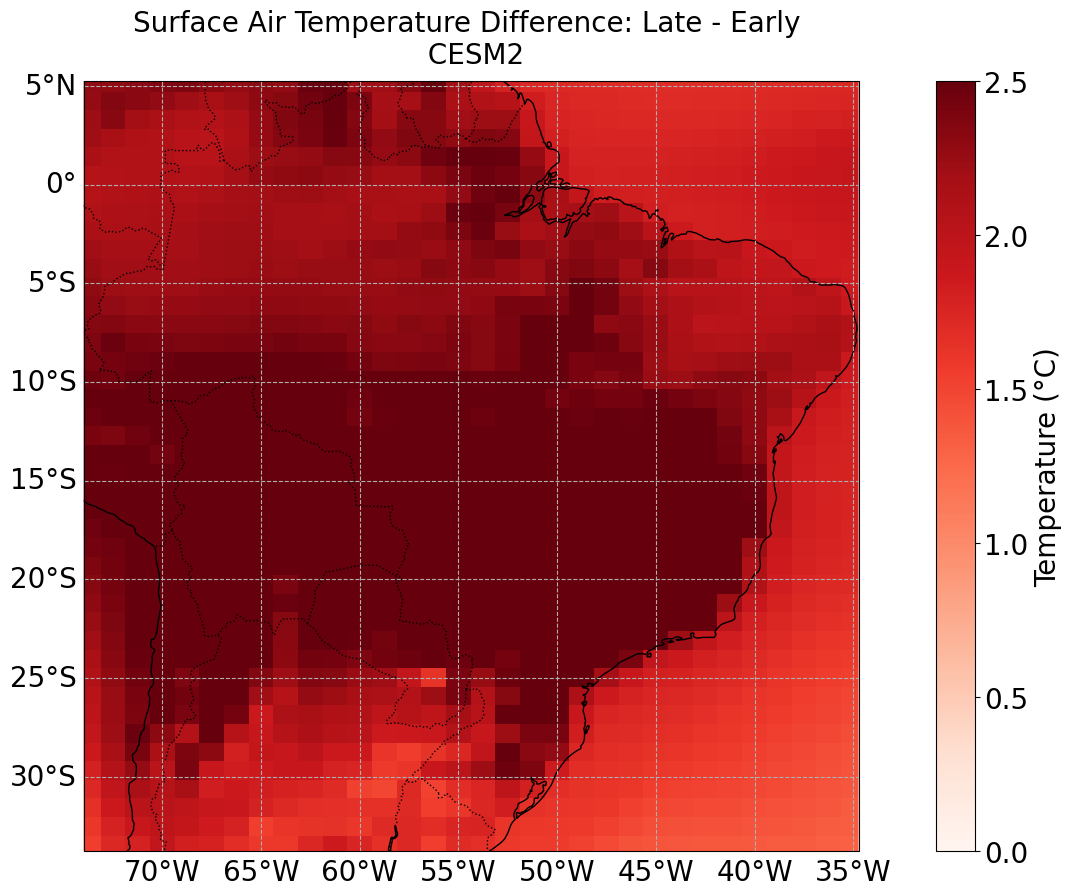

In [64]:
# Define object containing PlateCarree projection
map = ccrs.PlateCarree()

# Create figure/axis objects, use the map object to specify associated projection
fig, ax = plt.subplots(figsize=(20, 10), 
                       subplot_kw={"projection": map})

# Plot temperature data on the axes using the coolwarm colormap
plot = ax.pcolormesh(cesm_tas_late_avg.lon, 
                     cesm_tas_late_avg.lat, 
                     cesm_tas_late_avg.tas - cesm_tas_early_avg.tas, 
                     transform=map, cmap="Reds", vmin=0, vmax=2.5)

# Set spatial extent of plot
ax.set_extent(region, crs=ccrs.PlateCarree())

# Add colorbar and label it
cbar = plt.colorbar(plot, ax=ax)
cbar.set_label("Temperature (°C)", fontsize=20)
cbar.ax.tick_params(labelsize=20)

# Add coastline/border lines
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add grid lines
gl = ax.gridlines(draw_labels=True, linestyle="--") 
gl.top_labels = False
gl.right_labels = False

# Set font size for x, y-axis labels
gl.xlabel_style = {'size': 20}
gl.ylabel_style = {'size': 20}

# Add title, show plot
ax.set_title("Surface Air Temperature Difference: Late - Early \n CESM2", fontsize= 20)
plt.show()

#### GFDL-ESM4 Temperature Difference

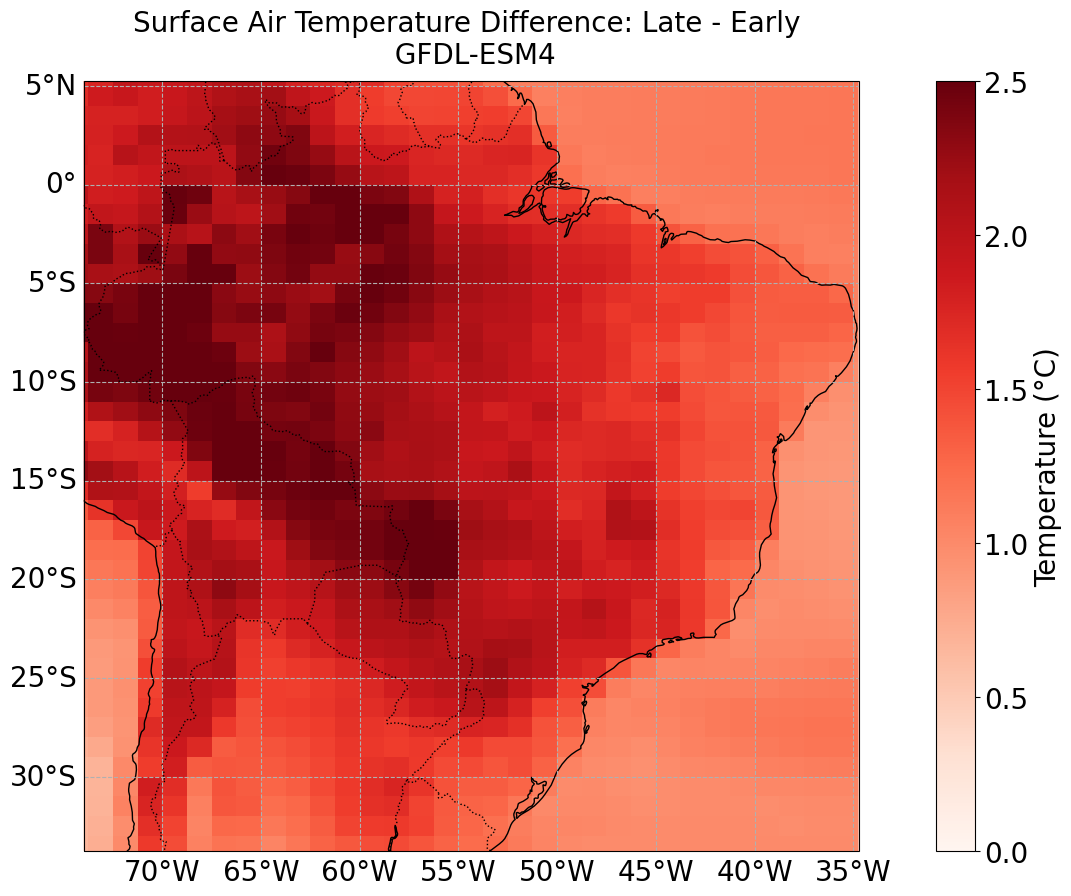

In [65]:
# Define object containing PlateCarree projection
map = ccrs.PlateCarree()

# Create figure/axis objects, use the map object to specify associated projection
fig, ax = plt.subplots(figsize=(20, 10), 
                       subplot_kw={"projection": map})

# Plot temperature data on the axes using the coolwarm colormap
plot = ax.pcolormesh(gfdl_tas_late_avg.lon, 
                     gfdl_tas_late_avg.lat, 
                     gfdl_tas_late_avg.tas - gfdl_tas_early_avg.tas, 
                     transform=map, cmap="Reds", vmin=0, vmax=2.5)

# Set spatial extent of plot
ax.set_extent(region, crs=ccrs.PlateCarree())

# Add colorbar and label it
cbar = plt.colorbar(plot, ax=ax)
cbar.set_label("Temperature (°C)", fontsize=20)
cbar.ax.tick_params(labelsize=20)

# Add coastline/border lines
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add grid lines
gl = ax.gridlines(draw_labels=True, linestyle="--") 
gl.top_labels = False
gl.right_labels = False

# Set font size for x, y-axis labels
gl.xlabel_style = {'size': 20}
gl.ylabel_style = {'size': 20}

# Add title, show plot
ax.set_title("Surface Air Temperature Difference: Late - Early \n GFDL-ESM4", fontsize= 20)
plt.show()

#### CESM2 Precipitation Difference 


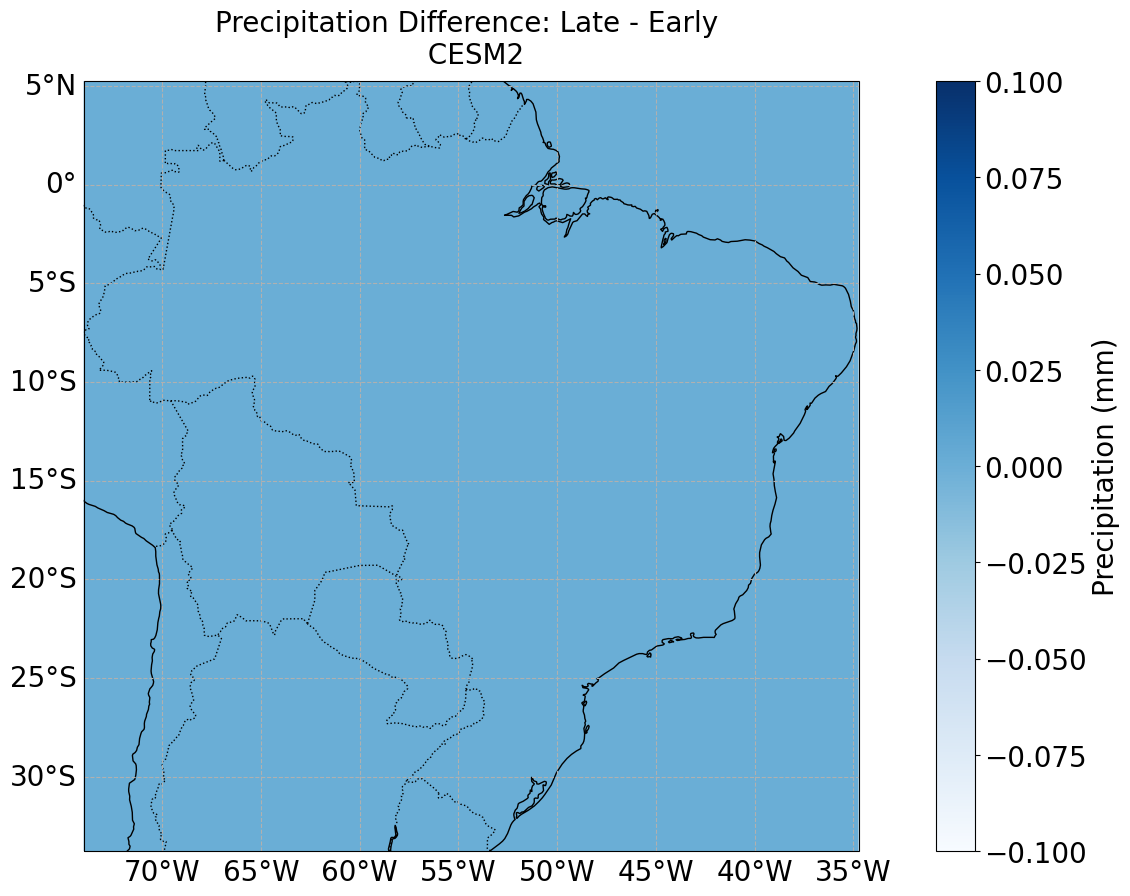

In [66]:
# Define object containing PlateCarree projection
map = ccrs.PlateCarree()

# Create figure/axis objects, use the map object to specify associated projection
fig, ax = plt.subplots(figsize=(20, 10), 
                       subplot_kw={"projection": map})

diff = (cesm_pr_late_daily.pr - cesm_pr_early_daily.pr).mean(dim='time')

# Plot temperature data on the axes using the coolwarm colormap
plot = ax.pcolormesh(cesm_pr_late_avg.lon, 
                     cesm_pr_late_avg.lat, 
                     diff, 
                     transform=map, cmap="Blues")

# Set spatial extent of plot
ax.set_extent(region, crs=ccrs.PlateCarree())

# Add colorbar and label it
cbar = plt.colorbar(plot, ax=ax)
cbar.set_label("Precipitation (mm)", fontsize=20)
cbar.ax.tick_params(labelsize=20)

# Add coastline/border lines
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add grid lines
gl = ax.gridlines(draw_labels=True, linestyle="--") 
gl.top_labels = False
gl.right_labels = False

# Set font size for x, y-axis labels
gl.xlabel_style = {'size': 20}
gl.ylabel_style = {'size': 20}

# Add title, show plot
ax.set_title("Precipitation Difference: Late - Early \n CESM2", fontsize= 20)
plt.show()

#### GFDL-ESM4 Precipitation Difference 

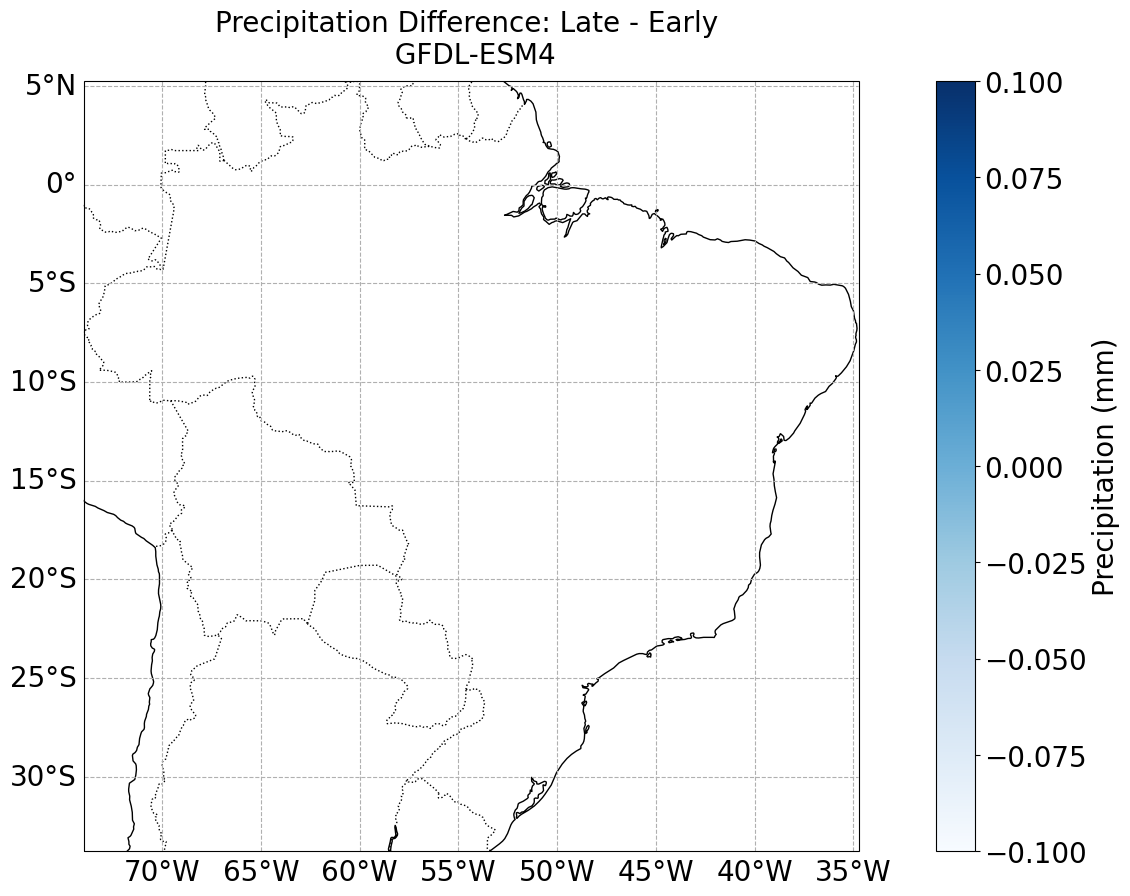

In [67]:
# Define object containing PlateCarree projection
map = ccrs.PlateCarree()

# Create figure/axis objects, use the map object to specify associated projection
fig, ax = plt.subplots(figsize=(20, 10), 
                       subplot_kw={"projection": map})

diff = (gfdl_pr_late_daily.pr - gfdl_pr_early_daily.pr).mean(dim='time')

# Plot temperature data on the axes using the coolwarm colormap
plot = ax.pcolormesh(gfdl_pr_late_daily.lon, 
                     gfdl_pr_late_daily.lat, 
                     diff, 
                     transform=map, cmap="Blues")

# Set spatial extent of plot
ax.set_extent(region, crs=ccrs.PlateCarree())

# Add colorbar and label it
cbar = plt.colorbar(plot, ax=ax)
cbar.set_label("Precipitation (mm)", fontsize=20)
cbar.ax.tick_params(labelsize=20)

# Add coastline/border lines
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add grid lines
gl = ax.gridlines(draw_labels=True, linestyle="--") 
gl.top_labels = False
gl.right_labels = False

# Set font size for x, y-axis labels
gl.xlabel_style = {'size': 20}
gl.ylabel_style = {'size': 20}

# Add title, show plot
ax.set_title("Precipitation Difference: Late - Early \n GFDL-ESM4", fontsize= 20)
plt.show()

### Conclusions

In this study, I analyzed surface air temperature and precipitation over Brazil using two CMIP6 models: CESM2 and GFDL-ESM4, under the high-emissions scenario SSP5-8.5. My results show a clear warming trend in both models from the early to late 21st century, with CESM2 projecting significantly more dramatic warming than GFDL-ESM4. This is consistent with CESM2’s higher equilibrium climate sensitivity and stronger climate feedbacks.

Precipitation trends varied regionally, but both models indicated potential changes in rainfall patterns that may affect water availability, particularly in the Amazon and semi-arid Northeast. However, CESM2 generally showed more intense temperature increases, which may amplify evapotranspiration and exacerbate dry-season conditions.

These differences highlight the importance of using multiple climate models to capture the range of possible future climates. CESM2 and GFDL-ESM4 provide valuable but contrasting perspectives, emphasizing the need to account for model uncertainty when assessing regional climate impacts in Brazil.